# 資料載入與初步檢視


初步載入歷史 Tick/分K 資料並進行初步檢視。


In [1]:
import os
import sys

# 將專案根目錄添加到 Python 搜尋路徑
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.data_loader import load_and_inspect_data

# 指定資料檔案路徑
data_path = '../data/ticks_2025-04.parquet'

# 載入資料並檢視
df = load_and_inspect_data(data_path)

if df is not None:
    print("\n資料欄位：")
    print(df.columns)
    print(f"資料筆數：{len(df)}")


資料載入成功！
前 5 行資料：
             ts    close  volume  bid_price  bid_volume  ask_price  \
0  1.743433e+18  20807.0    89.0        0.0         0.0        0.0   
1  1.743433e+18  20808.0     2.0    20807.0         5.0    20808.0   
3  1.743433e+18  20809.0     1.0    20807.0         5.0    20808.0   
5  1.743433e+18  20807.0     1.0    20807.0         5.0    20810.0   
6  1.743433e+18  20807.0     1.0    20807.0         6.0    20810.0   

   ask_volume  tick_type               timestamp  is_traffic_limited  
0         0.0        1.0 2025-03-31 15:00:00.021               False  
1         2.0        1.0 2025-03-31 15:00:00.045               False  
3         2.0        1.0 2025-03-31 15:00:00.051               False  
5        15.0        2.0 2025-03-31 15:00:00.118               False  
6        18.0        2.0 2025-03-31 15:00:00.176               False  

資料基本資訊：
<class 'pandas.core.frame.DataFrame'>
Index: 3623517 entries, 0 to 126096
Data columns (total 10 columns):
 #   Column         

# 資料清洗

處理資料中的缺失值、異常值和重複資料。


In [2]:
import importlib
import utils.data_cleaner
importlib.reload(utils.data_cleaner)

from utils.data_cleaner import clean_data

df = clean_data(df)






處理缺失值前：
ts                    4
close                 4
volume                4
bid_price             4
bid_volume            4
ask_price             4
ask_volume            4
tick_type             4
timestamp             0
is_traffic_limited    0
dtype: int64

處理缺失值後：
ts                    0
close                 0
volume                0
bid_price             0
bid_volume            0
ask_price             0
ask_volume            0
tick_type             0
timestamp             0
is_traffic_limited    0
dtype: int64

處理異常值前：
                 ts         close        volume     bid_price    bid_volume  \
count  3.623513e+06  3.623513e+06  3.623513e+06  3.623513e+06  3.623513e+06   
mean   1.744626e+18  1.926879e+04  1.497686e+00  1.925888e+04  6.805559e+00   
min    1.743433e+18  1.701500e+04  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.744153e+18  1.863300e+04  1.000000e+00  1.863000e+04  2.000000e+00   
50%    1.744401e+18  1.934800e+04  1.000000e+00  1.934700e+04  3.000000e

# 時間序列處理

將時間欄位設定為索引，標準化時間格式，並處理非交易時間資料。


In [3]:
import importlib
import utils.data_cleaner
importlib.reload(utils.data_cleaner)

from utils.data_cleaner import process_time_series

df = process_time_series(df)


時間序列處理後：
                                   ts    close  volume  bid_price  bid_volume  \
timestamp                                                                       
2025-03-31 15:00:00.021  1.743433e+18  20807.0    89.0        0.0         0.0   
2025-03-31 15:00:00.045  1.743433e+18  20808.0     2.0    20807.0         5.0   
2025-03-31 15:00:00.051  1.743433e+18  20809.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.118  1.743433e+18  20807.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.176  1.743433e+18  20807.0     1.0    20807.0         6.0   

                         ask_price  ask_volume  tick_type  is_traffic_limited  
timestamp                                                                      
2025-03-31 15:00:00.021        0.0         0.0        1.0               False  
2025-03-31 15:00:00.045    20808.0         2.0        1.0               False  
2025-03-31 15:00:00.051    20808.0         2.0        1.0               False  
2025-03-31 15:00:00.11

# 初步探索性資料分析 (EDA)

進行初步的探索性資料分析，可視化價格、成交量等數據。


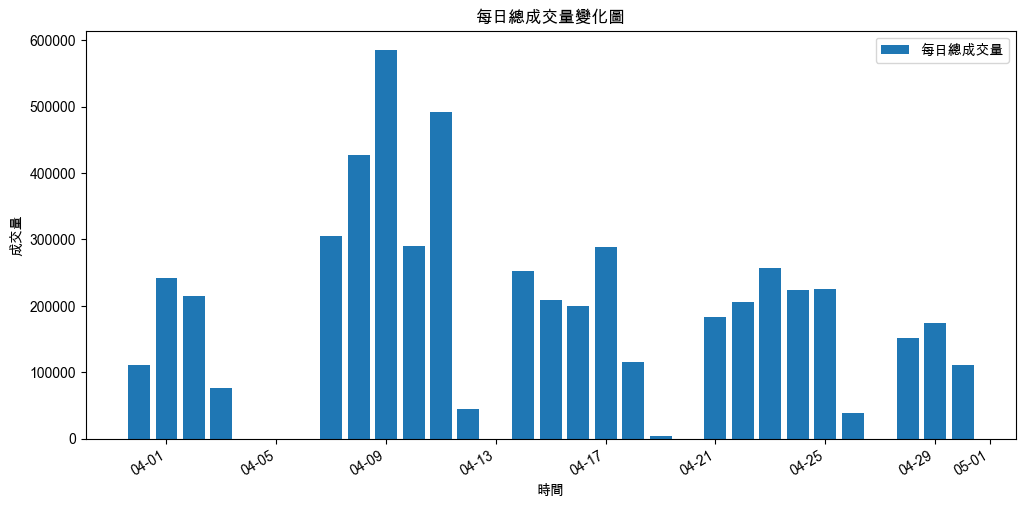

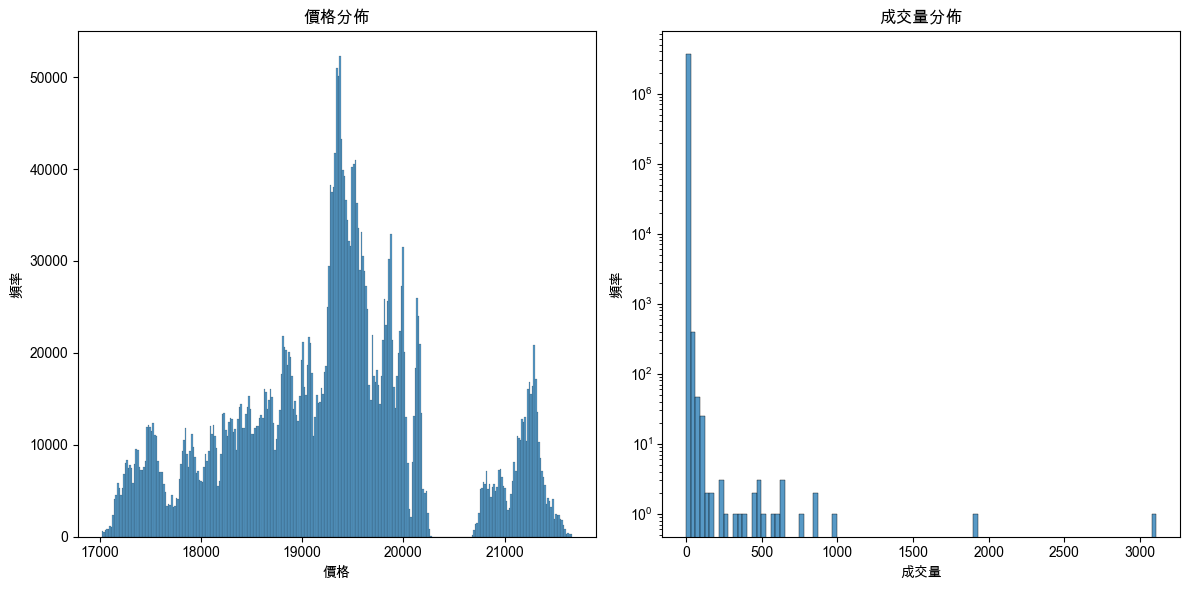

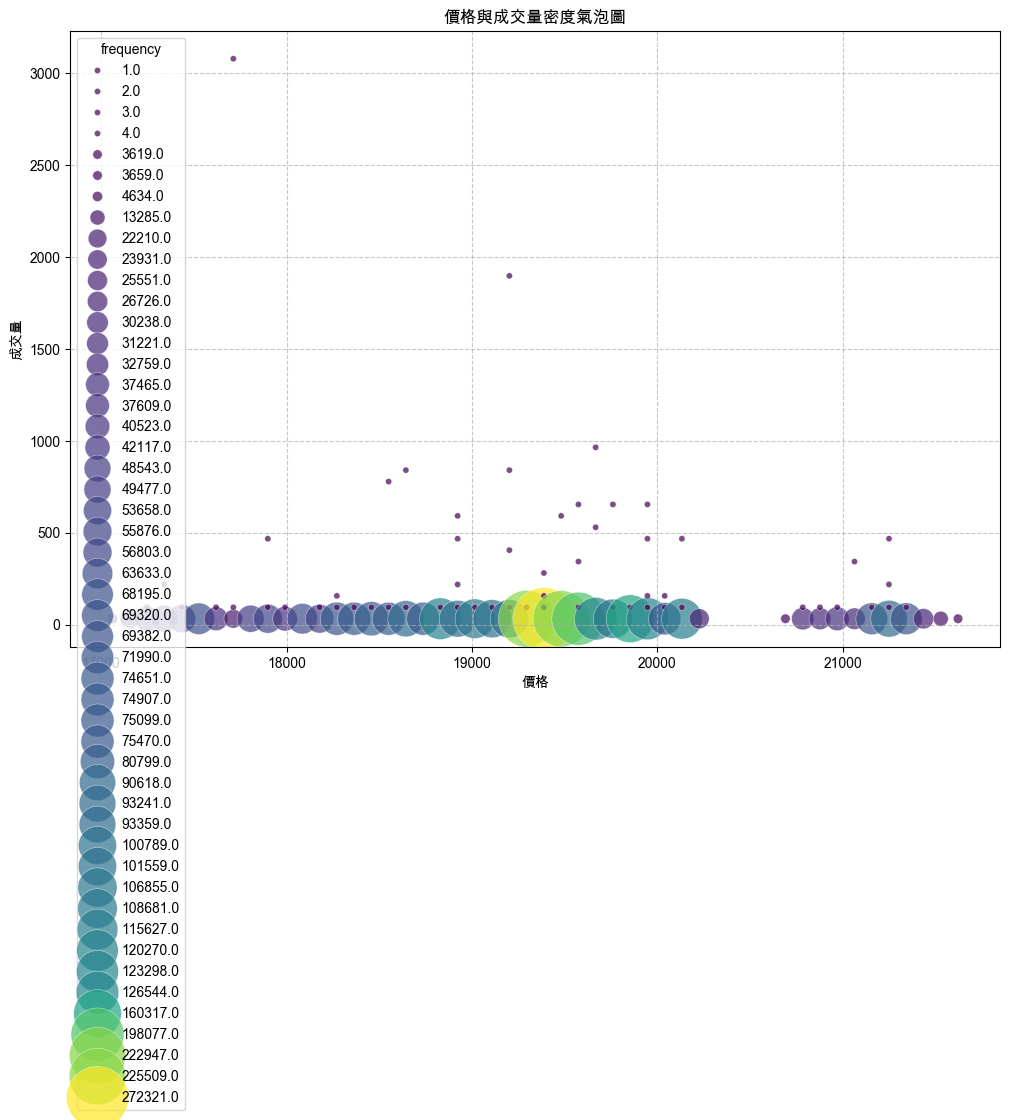

In [4]:
import importlib
from utils import eda_analyzer
importlib.reload(eda_analyzer)

import pandas as pd

eda_analyzer.plot_daily_close_price(df)

eda_analyzer.plot_daily_volume(df)

eda_analyzer.plot_price_volume_distribution(df)

eda_analyzer.plot_price_volume_scatter(df)


# 技術指標特徵工程 (基礎)

計算基礎的技術指標作為初步特徵。


In [5]:
import pandas as pd
from features import feature_engineering

# 假設 df 已經載入並經過清洗和時間序列處理
# 如果您還沒有 df，可以先執行以下範例來創建一個模擬的 DataFrame
# 實際應用中，df 應該是從您的資料載入流程中獲取
# 例如：
# from utils.data_loader import load_and_inspect_data
# from utils.data_cleaner import clean_data, process_time_series
# data_path = '../data/ticks_2025-04.parquet'
# df = load_and_inspect_data(data_path)
# df = clean_data(df)
# df = process_time_series(df)


print("\n開始計算技術指標特徵...")

# 計算簡單移動平均 (SMA)
df['SMA_20'] = feature_engineering.calculate_sma(df['close'], window=20)

# 計算指數移動平均 (EMA)
df['EMA_20'] = feature_engineering.calculate_ema(df['close'], window=20)

# 計算相對強弱指數 (RSI)
df['RSI_14'] = feature_engineering.calculate_rsi(df['close'], window=14)

# 計算布林通道 (Bollinger Bands)
bollinger_bands = feature_engineering.calculate_bollinger_bands(df['close'], window=20, num_std_dev=2)
df = pd.concat([df, bollinger_bands], axis=1)

print("\n新增技術指標特徵後：")
print(df.head())
print(df.tail())
print(f"資料欄位：{df.columns.tolist()}")



開始計算技術指標特徵...

新增技術指標特徵後：
                                   ts    close  volume  bid_price  bid_volume  \
timestamp                                                                       
2025-03-31 15:00:00.021  1.743433e+18  20807.0    89.0        0.0         0.0   
2025-03-31 15:00:00.045  1.743433e+18  20808.0     2.0    20807.0         5.0   
2025-03-31 15:00:00.051  1.743433e+18  20809.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.118  1.743433e+18  20807.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.176  1.743433e+18  20807.0     1.0    20807.0         6.0   

                         ask_price  ask_volume  tick_type  is_traffic_limited  \
timestamp                                                                       
2025-03-31 15:00:00.021        0.0         0.0        1.0               False   
2025-03-31 15:00:00.045    20808.0         2.0        1.0               False   
2025-03-31 15:00:00.051    20808.0         2.0        1.0               False   


# 製作標註欄位 (Target Labeling)

定義預測目標並創建對應的標註欄位。


In [14]:
import importlib
import pandas as pd
from features import labeling  # 確保 features/labeling.py 裡的 create_up_down_label 是 merge_asof 版本
importlib.reload(labeling)

# 正確寫成 '30min' 或 '30T'，表示 30 分鐘
lookahead_window_30m = '30min'
price_change_threshold_30m = 0.005  # 0.5%

print(f"\n正在創建 {lookahead_window_30m} 漲跌標註欄位...")
df['target_30m_up_down'] = labeling.create_up_down_label(
    data=df['close'],
    window=lookahead_window_30m,
    threshold=price_change_threshold_30m
)

# 把跟不動未來 30 分鐘（例如收盤前最後幾筆）對不上價格的那幾筆丟掉
df.dropna(subset=['target_30m_up_down'], inplace=True)

print("\n新增標註欄位後：")
print(df.head())
print("\n標註欄位分佈：")
print(df['target_30m_up_down'].value_counts())



正在創建 30min 漲跌標註欄位...

新增標註欄位後：
                                   ts    close  volume  bid_price  bid_volume  \
timestamp                                                                       
2025-03-31 15:00:00.021  1.743433e+18  20807.0    89.0        0.0         0.0   
2025-03-31 15:00:00.045  1.743433e+18  20808.0     2.0    20807.0         5.0   
2025-03-31 15:00:00.051  1.743433e+18  20809.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.118  1.743433e+18  20807.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.176  1.743433e+18  20807.0     1.0    20807.0         6.0   

                         ask_price  ask_volume  tick_type  is_traffic_limited  \
timestamp                                                                       
2025-03-31 15:00:00.021        0.0         0.0        1.0               False   
2025-03-31 15:00:00.045    20808.0         2.0        1.0               False   
2025-03-31 15:00:00.051    20808.0         2.0        1.0               Fals

In [15]:
import pandas as pd
import plotly.graph_objects as go

# 假設 df 已包含：
#   df['close']             -> 收盤價 (tick 資料)
#   df['target_30m_up_down'] -> 標籤 (0/1)
#   index 是 DatetimeIndex（tick 級別）

# -----------------------------------------------------------------------------
# 1. 範例：每秒取一筆資料
# -----------------------------------------------------------------------------
# 這裡以「每秒」取最後一筆 (last) 成交價，至於標籤你可以用 max()（只要該秒內有一次 label=1，就標為 1）
df_per_second = df.resample('1S').agg({
    'close': 'last',
    'target_30m_up_down': 'max'
}).dropna(subset=['close'])  # 如果某些秒內根本沒成交，就會是 NaN，可以 drop

# -----------------------------------------------------------------------------
# 2. 範例：每分鐘取一筆資料
# -----------------------------------------------------------------------------
# 同理，「1T」表示每分鐘，取該分鐘最後一筆成交價；標籤取 max()
df_per_minute = df.resample('1T').agg({
    'close': 'last',
    'target_30m_up_down': 'max'
}).dropna(subset=['close'])

# -----------------------------------------------------------------------------
# 3. 如果你想「每分鐘隨機抽一筆 tick」也可以這樣做：
# -----------------------------------------------------------------------------
# 這段會把 df 按照分鐘分組，並在每組裡隨機抽一個索引 (sampling)
def sample_one_per_minute(group):
    return group.sample(n=1)

df_random_per_minute = (
    df
    .copy()
    .assign(minute=df.index.floor('T'))    # 先加一個「分鐘」欄位
    .groupby('minute')
    .apply(sample_one_per_minute)
    .droplevel(0)                           # 去掉 groupby 加的第一層索引
)

# -----------------------------------------------------------------------------
# 4. 最後用 plotly 畫圖（以每分鐘取樣為例）
# -----------------------------------------------------------------------------
up_df    = df_per_minute[df_per_minute['target_30m_up_down'] == 1]
down_df  = df_per_minute[df_per_minute['target_30m_up_down'] == 0]

fig = go.Figure()

# 4.1 價格折線
fig.add_trace(
    go.Scatter(
        x=df_per_minute.index,
        y=df_per_minute['close'],
        mode='lines',
        name='Close Price (per minute)',
        line=dict(width=1, color='blue')
    )
)

# 4.2 標籤為 Up 的點
fig.add_trace(
    go.Scatter(
        x=up_df.index,
        y=up_df['close'],
        mode='markers',
        name='Label = 1 (Up)',
        marker=dict(symbol='triangle-up', color='green', size=8)
    )
)

# 4.3 標籤為 Down/Flat 的點
fig.add_trace(
    go.Scatter(
        x=down_df.index,
        y=down_df['close'],
        mode='markers',
        name='Label = 0 (Down/Flat)',
        marker=dict(symbol='triangle-down', color='red', size=8)
    )
)

fig.update_layout(
    title='每分鐘取樣後的 Close Price 與 30 分鐘後漲跌標註（Plotly 互動式）',
    xaxis_title='Time',
    yaxis_title='Price',
    template='plotly_white'
)
fig.show()


/var/folders/vd/42xdkbnj4w334lmdgnzyg94w0000gn/T/ipykernel_45305/1078659011.py:13: FutureWarning:

'S' is deprecated and will be removed in a future version, please use 's' instead.

/var/folders/vd/42xdkbnj4w334lmdgnzyg94w0000gn/T/ipykernel_45305/1078659011.py:22: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.

/var/folders/vd/42xdkbnj4w334lmdgnzyg94w0000gn/T/ipykernel_45305/1078659011.py:37: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.

/var/folders/vd/42xdkbnj4w334lmdgnzyg94w0000gn/T/ipykernel_45305/1078659011.py:35: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

